# Evaluating Regression Models
----------

## Exercises
Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1. Load the tips dataset from either pydataset or seaborn.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

    Here is some sample code to get you started:

    ```python
    from sklearn.linear_model import LinearRegression
    # assuming X and y are already defined
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)
    ``` 
    
Modify and add to the code above as necessary for it to work with the tips dataset.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression

import env
import wrangle



-----------
# 1.
Load the tips dataset from either pydataset or seaborn.

In [2]:
# Load an example dataset
df = sns.load_dataset("tips")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [5]:
 # train/validate/test split
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(f"train ={train.shape}, validate ={validate.shape}, test ={test.shape}")

train =(136, 7), validate =(59, 7), test =(49, 7)


In [6]:
X = train[['tip']]
y = train['total_bill']

Text(0, 0.5, 'y = total bill')

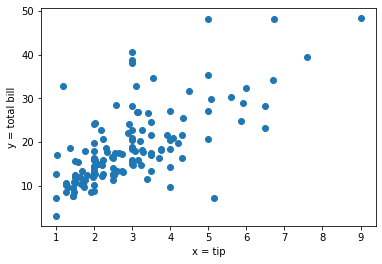

In [7]:
#look at x vs Y 
plt.scatter(train.tip, train.total_bill)
plt.xlabel('x = tip')
plt.ylabel('y = total bill')

In [8]:
baseline = round(train.total_bill.mean(), 2)
baseline

18.79

In [9]:
#Baseline is mean of dependent vairiable
train['yhat_baseline'] = round(train.total_bill.mean(), 2)

In [10]:
train.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline
18,16.97,3.50,Female,No,Sun,Dinner,3,18.79
172,7.25,5.15,Male,Yes,Sun,Dinner,2,18.79
118,12.43,1.80,Female,No,Thur,Lunch,2,18.79


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 18 to 166
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   total_bill     136 non-null    float64 
 1   tip            136 non-null    float64 
 2   sex            136 non-null    category
 3   smoker         136 non-null    category
 4   day            136 non-null    category
 5   time           136 non-null    category
 6   size           136 non-null    int64   
 7   yhat_baseline  136 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 6.4 KB


# 2. 
Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Text(0, 0.5, 'y = total bill')

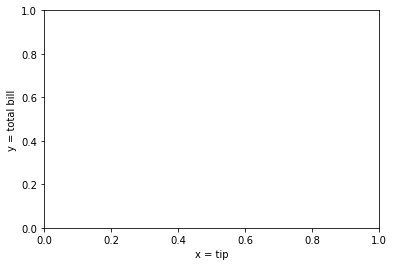

In [12]:
# stablish x(continious) and y(target)
plt.xlabel('x = tip')
plt.ylabel('y = total bill')


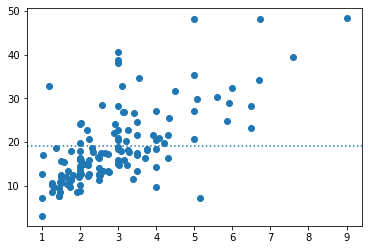

In [13]:
#lets plot data with baseline prediction
plt.scatter(train.tip, train.total_bill)
plt.axhline(round(train.total_bill.mean()), ls =':')

In [14]:
# *uses* from sklearn.linear_model import LinearRegression
# Model one Linear Regression OLS(ordinary least squares)
# generate parameters, i.e. create model
ols_model = LinearRegression().fit(X, y)
# compute predictions and add to original dataframe
train['osl_y_hat'] = ols_model.predict(X)

In [15]:
train.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,osl_y_hat
18,16.97,3.50,Female,No,Sun,Dinner,3,18.79,21.060998
172,7.25,5.15,Male,Yes,Sun,Dinner,2,18.79,27.835314
118,12.43,1.80,Female,No,Thur,Lunch,2,18.79,14.081399
28,21.70,4.30,Male,No,Sat,Dinner,2,18.79,24.345515
237,32.83,1.17,Male,Yes,Sat,Dinner,2,18.79,11.494842


Text(0.5, 1.0, 'OLS linear model')

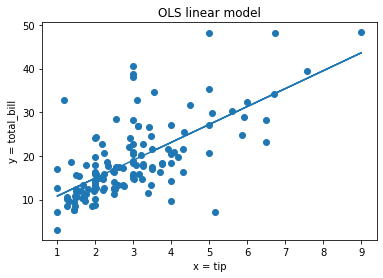

In [41]:
plt.scatter(train.tip, train.total_bill)
plt.plot(train.tip, train.osl_y_hat)
plt.xlabel('x = tip')
plt.ylabel('y = total_bill')
plt.title('OLS linear model')

# 3.
Plot the residuals for the linear regression model that you made.

### Regression metrics:

- Compare baseline
- Compare different models with different indepemdent variables

### Vocabulary
- Residual - error (actual minus predicted)
- SSE (Sum of square error)
- MSE (Mean square error)
- RMSE (Root mean square error)

----
## Residual Error
- Predicted `y` vs actual `y`

In [17]:
# rsidual = actual - predicted
train['residual'] = train.total_bill - train.osl_y_hat
train['baseline_residual'] = train.total_bill - train.yhat_baseline

In [18]:
train.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,osl_y_hat,residual,baseline_residual
18,16.97,3.50,Female,No,Sun,Dinner,3,18.79,21.060998,-4.090998,-1.82
172,7.25,5.15,Male,Yes,Sun,Dinner,2,18.79,27.835314,-20.585314,-11.54
118,12.43,1.80,Female,No,Thur,Lunch,2,18.79,14.081399,-1.651399,-6.36


In [19]:
# sum of residual
train.residual.sum()

-3.765876499528531e-13

In [20]:
train.baseline_residual.sum()

0.07000000000011042

<AxesSubplot:xlabel='baseline_residual', ylabel='residual'>

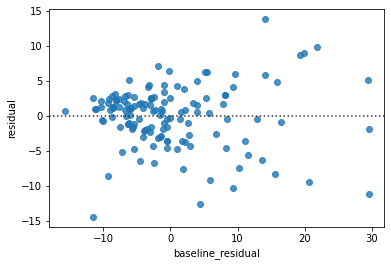

In [42]:
sns.residplot(x = train.baseline_residual, y = train.residual)

------
# 4.
Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [22]:
# SSE (Sum of square errors)

# square each residual value
train['residual^2'] = train.residual ** 2
train['baseline_residual^2'] = train.baseline_residual ** 2

train.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,osl_y_hat,residual,baseline_residual,residual^2,baseline_residual^2
18,16.97,3.50,Female,No,Sun,Dinner,3,18.79,21.060998,-4.090998,-1.82,16.736261,3.3124
172,7.25,5.15,Male,Yes,Sun,Dinner,2,18.79,27.835314,-20.585314,-11.54,423.755151,133.1716
118,12.43,1.80,Female,No,Thur,Lunch,2,18.79,14.081399,-1.651399,-6.36,2.727118,40.4496
28,21.70,4.30,Male,No,Sat,Dinner,2,18.79,24.345515,-2.645515,2.91,6.998747,8.4681
237,32.83,1.17,Male,Yes,Sat,Dinner,2,18.79,11.494842,21.335158,14.04,455.188986,197.1216


In [23]:
# SSE
SSE = sum(train['residual^2'])
SSE_baseline = sum(train['baseline_residual^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  5578.114293123066
SSE - baseline =  10406.301499999994


-------

In [24]:
# MSE (Mean Squared Error)
MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  41.01554627296372
MSE baseline =  76.5169227941176


--------

In [25]:
# RMSE
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  6.404338082344164
RMSE baseline =  8.747395200522131


# 5. 
Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [44]:
print("SSE - baseline = ", SSE_baseline)
print("MSE baseline = ", MSE_baseline)
print("RMSE baseline = ", RMSE_baseline)

SSE - baseline =  10406.301499999994
MSE baseline =  76.5169227941176
RMSE baseline =  8.747395200522131


--------
# 6.
Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [45]:
train_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
train_eval['model_error'] = np.array([SSE,  MSE, RMSE])

In [46]:
train_eval

,metric,model_error
0,SSE,5578.114293
1,MSE,41.015546
2,RMSE,6.404338


In [48]:
train_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])

train_eval

,metric,model_error,baseline_error
0,SSE,5578.114293,10406.301500
1,MSE,41.015546,76.516923
2,RMSE,6.404338,8.747395


In [52]:
train_eval['better_than_baseline'] = train_eval.baseline_error > train_eval.model_error
train_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,5578.114293,10406.301500,True
1,MSE,41.015546,76.516923,True
2,RMSE,6.404338,8.747395,True


# 7.
What is the amount of variance explained in your model?

In [54]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [56]:
train.head(1)

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,osl_y_hat,residual,baseline_residual,residual^2,baseline_residual^2
18,16.97,3.5,Female,No,Sun,Dinner,3,18.79,21.060998,-4.090998,-1.82,16.736261,3.3124


In [64]:
from sklearn.metrics import r2_score
r2_score(train.total_bill, train.osl_y_hat)

0.4639676437939072

# 8. 
Is your model better than the baseline model? 
- Yes. error numbers are less than model errors.

# 9. 
Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the -baseline, otherwise false

### Fiale created

# 10.
Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [79]:
from pydataset import data
from evaluate import regression_errors, better_than_baseline
mpg = data('mpg')
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


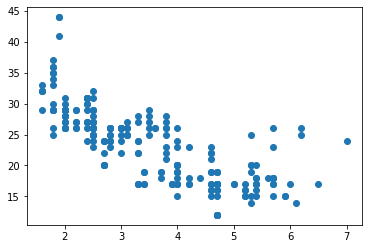

In [69]:
#plot displacement vs highway mpg

plt.scatter(mpg.displ, mpg.hwy)

In [70]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(mpg[['displ']], mpg.hwy)

# make prediction
predictions = lm.predict(mpg[['displ']])

Text(0, 0.5, 'highway mpg')

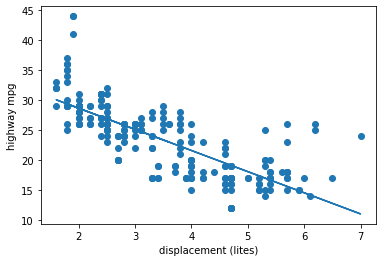

In [71]:
# plot regression line

plt.scatter(mpg.displ, mpg.hwy)
plt.plot(mpg.displ, predictions)
plt.xlabel('displacement (lites)')
plt.ylabel('highway mpg')

Text(0.5, 0, 'displacement (liters)')

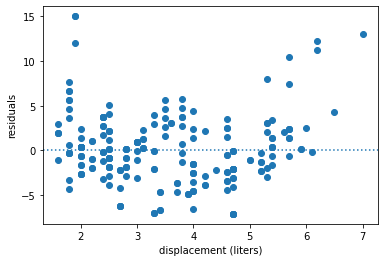

In [72]:
# plot displacement vs residuals

plt.scatter(mpg.displ, (mpg.hwy - predictions))
plt.axhline(0, ls = ':')
plt.ylabel('residuals')
plt.xlabel('displacement (liters)')

In [73]:
mpg[mpg.displ > 5]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
21,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
23,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
24,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
25,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
26,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
27,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
28,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater


In [89]:
# calculate regressions errors
evaluate.regression_errors(mpg.hwy, predictions)

NameError: name 'pd' is not defined

In [87]:
# is our model better than baseline?

evaluate.better_than_baseline(mpg.hwy, predictions)

NameError: name 'math' is not defined

In [90]:
# R2 score

r2_score(mpg.hwy, predictions)

0.5867866723989039